In [1]:
MAKE_BOOK_FIGURES=Trueimport numpy as npimport scipy.stats as stimport matplotlib as mplimport matplotlib.pyplot as plt%matplotlib inlineimport matplotlib_inlinematplotlib_inline.backend_inline.set_matplotlib_formats('svg')import seaborn as snssns.set_context("paper")sns.set_style("ticks")def set_book_style():    plt.style.use('seaborn-v0_8-white')     sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings        'font.family': 'serif',  # For academic publishing        'font.size': 8,  # As requested, 10pt font        'axes.labelsize': 8,        'axes.titlesize': 8,        'xtick.labelsize': 7,  # Slightly smaller for better readability        'ytick.labelsize': 7,        'legend.fontsize': 7,                # Line and marker settings for consistency        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout to prevent clipped labels        'figure.constrained_layout.use': True,                # Default DPI (will override when saving)        'figure.dpi': 600,        'savefig.dpi': 600,                # Despine - remove top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional trim settings        'figure.autolayout': True,  # Alternative to constrained_layout        'savefig.bbox': 'tight',    # Trim when saving        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off    })def set_notebook_style():    plt.style.use('seaborn-v0_8-white')    sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings - using default sizes        'font.family': 'serif',        'axes.labelsize': 10,        'axes.titlesize': 10,        'xtick.labelsize': 9,        'ytick.labelsize': 9,        'legend.fontsize': 9,                # Line and marker settings        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout settings        'figure.constrained_layout.use': True,                # Remove only top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional settings        'figure.autolayout': True,        'savefig.bbox': 'tight',        'savefig.pad_inches': 0.1    })def save_for_book(fig, filename, is_vector=True, **kwargs):    """    Save a figure with book-optimized settings.        Parameters:    -----------    fig : matplotlib figure        The figure to save    filename : str        Filename without extension    is_vector : bool        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.    **kwargs : dict        Additional kwargs to pass to savefig    """        # Set appropriate DPI and format based on figure type    if is_vector:        dpi = 1000        ext = '.pdf'    else:        dpi = 600        ext = '.tif'        # Save the figure with book settings    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)def make_full_width_fig():    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)def make_half_width_fig():    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)if MAKE_BOOK_FIGURES:    set_book_style()else:    set_notebook_style()make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(uniform-distribution)=
# The Uniform Distribution

The uniform distribution is the most common continuous distribution.
It corresponds to a random variable equally likely to take a value within a given interval.
We write:

$$
X\sim U([0,1]),
$$

and we read $X$ follows a uniform distribution taking values in $[0,1]$.

The PDF of the uniform is constant in $[0,1]$ and zero outside it.
We have:

$$
f_X(x) := U(x|[0,1]) := \begin{cases}
1,&\;0\le x \le 1,\\
0,&\;\text{otherwise}.
\end{cases}
$$

Here is how you can make this random variable in [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html):

In [2]:
import scipy.stats as st
X = st.uniform()

You can evaluate the PDF anywhere like this:

In [3]:
X.pdf(0.5)

1.0

In [4]:
X.pdf(-0.1)

0.0

Here is the plot of the PDF:

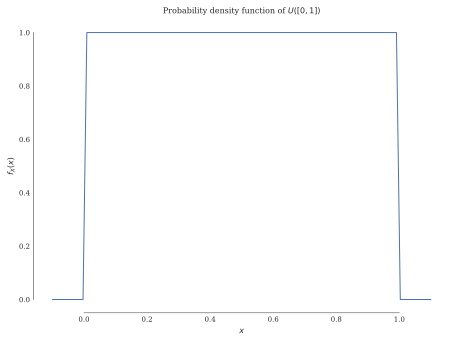

In [5]:
import numpy as np
x = np.linspace(-0.1, 1.1, 100)
plt.plot(x, X.pdf(x))
plt.xlabel('$x$')
plt.ylabel('$f_X(x)$')
plt.title('Probability density function of $U([0,1])$')
sns.despine(trim=True);

The CDF of the uniform is for $x$ in $[0,1]$:

$$
F(x) = p(X \le x) = \int_0^x f_X(u) du = \int_0^x du = x.
$$

Obviously, we have $F(x) = 0$ for $x < 0$ and $F(x) = 1$ for $x > 1$.

If you have a scipy random variable, you can evaluate the CDF like this:

In [6]:
X.cdf(0.5)

0.5

And here is the plot of the CDF:

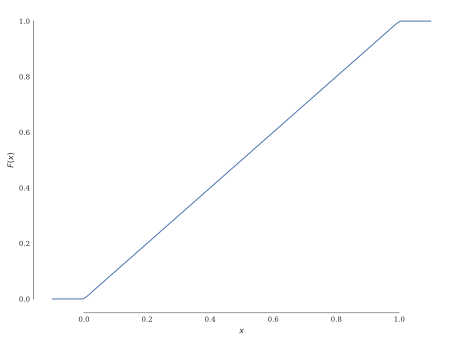

In [7]:
fig, ax = plt.subplots()
ax.plot(x, X.cdf(x))
ax.set_xlabel("$x$")
ax.set_ylabel("$F(x)$")
sns.despine(trim=True);

The probability that $X$ takes values in $[a,b]$ for $a < b$ in $[0,1]$ is:

$$
p(a \le X \le b) = F(b) - F(a) = b - a.
$$

The expectation of the uniform is:

$$
\mathbb{E}[X] = \int_0^1 xdx = \frac{1}{2}.
$$

The variance of the uniform is:

$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \left(\mathbb{E}[X]\right)^2 = \frac{1}{3} - \frac{1}{4} = \frac{1}{12}.
$$

You can get the expectation from scipy like this:

In [8]:
print(f"E[X] = {X.expect():.2f}")

E[X] = 0.50


Similarly for the variance:

In [9]:
# The variance is:
print(f"V[X] = {X.var():.2f}")

V[X] = 0.08


Here is how you can sample from the uniform one hundred times:

In [10]:
X.rvs(size=100)

array([0.76729017, 0.36952278, 0.10087681, 0.07862868, 0.60059355,
       0.67411476, 0.52692837, 0.74775941, 0.32725188, 0.09251002,
       0.84754023, 0.48967682, 0.53803498, 0.63307813, 0.31388762,
       0.81414139, 0.71660186, 0.40905378, 0.46989262, 0.16505625,
       0.8165627 , 0.58280347, 0.84913497, 0.65398629, 0.92523862,
       0.55441257, 0.15409921, 0.75380523, 0.81245847, 0.15343603,
       0.93335657, 0.85958455, 0.57108753, 0.17125569, 0.24601956,
       0.25005015, 0.89133982, 0.10301823, 0.64911844, 0.22709183,
       0.01927219, 0.95021723, 0.6476825 , 0.01218941, 0.89630753,
       0.59988331, 0.33984252, 0.66573216, 0.69288164, 0.62555955,
       0.27574074, 0.5206354 , 0.61875597, 0.41581619, 0.4513762 ,
       0.92981875, 0.227476  , 0.43180579, 0.21190154, 0.49153453,
       0.49341273, 0.61105989, 0.07411594, 0.1829612 , 0.01207508,
       0.24722949, 0.55046647, 0.04399492, 0.09769202, 0.43167262,
       0.70403407, 0.07128094, 0.04293587, 0.70561647, 0.17386

An alternative way is to use the functionality of numpy:

In [11]:
np.random.rand(100)

array([0.93093137, 0.16267519, 0.98072917, 0.55046935, 0.61283248,
       0.74779252, 0.22316264, 0.56462595, 0.92195484, 0.76353306,
       0.4694509 , 0.78917924, 0.04214299, 0.75893337, 0.25455189,
       0.9561007 , 0.62399571, 0.6791297 , 0.72893628, 0.05441865,
       0.85144579, 0.97866923, 0.85819365, 0.64255414, 0.28482819,
       0.11235003, 0.27351465, 0.19731848, 0.48427637, 0.67619509,
       0.34797569, 0.70134629, 0.04246567, 0.08694933, 0.93984669,
       0.87682069, 0.41592074, 0.35655285, 0.13357834, 0.01134986,
       0.80493372, 0.07183044, 0.51270814, 0.76724534, 0.22777905,
       0.93031754, 0.40681666, 0.72016314, 0.31751413, 0.359763  ,
       0.89388459, 0.1223253 , 0.84354193, 0.17038232, 0.30717771,
       0.65363139, 0.98618411, 0.46358422, 0.25264433, 0.79273715,
       0.9239096 , 0.017061  , 0.58550893, 0.73638448, 0.57617304,
       0.45232555, 0.20714044, 0.8360547 , 0.7700278 , 0.8926971 ,
       0.74378973, 0.62038716, 0.83780607, 0.02930129, 0.16029

Finally, let's find the probability that X is between two numbers.
In particular, we will find $p(-1 \le X \le 0.3)$:

In [12]:
a = -1.0
b = 0.3
prob_X_is_in_ab = X.cdf(b) - X.cdf(a)
print(f"p({a:.2f} <= X <= {b:.2f}) = {prob_X_is_in_ab:.2f}")

p(-1.00 <= X <= 0.30) = 0.30


(uniform-ab)=
## The uniform distribution over an arbitrary interval $[a, b]$

One can define a uniform distribution over an arbitrary interval $[a,b]$.
We write:

$$
X \sim U([a, b]).
$$

The PDF of this random variable is:

$$
f_X(x) = \begin{cases}
c,&\;x\in[a,b],\\
0,&\;\text{otherwise},
\end{cases}
$$

where $c$ is a positive constant.
The formula tells us that the probability density of finding $X$ in $[a,b]$ is positive and that the probability density of finding outside is zero.
We can determine the positive constant $c$ by imposing the normalization condition:

$$
\int_{-\infty}^{+\infty}f_X(x)dx = 1.
$$

Carrying out the integral:

$$
1 = \int_{-\infty}^{+\infty}p(x)dx = \int_a^bc dx = c \int_a^bdx = c (b-a).
$$

Therefore:

$$
c = \frac{1}{b - a},
$$

and we can now write:

$$
f_X(x) = \begin{cases}
\frac{1}{b-a},&x \in [a, b],\\
0,&\;\text{otherwise},
\end{cases}
$$

From the PDF, we can now find the CDF for $x \in [a,b]$:

$$
F(x) = p(X\le x) = \int_{-\infty}^x f_X(u)du = \int_a^x \frac{1}{b-a}du = \frac{1}{b-a}\int_a^xdu = \frac{x-a}{b-a}.
$$

The expectation is:

$$
\mathbb{E}[X] = \frac{1}{2}(a+b),
$$

and the variance is:

$$
\mathbb{V}[X] = \frac{1}{12}(b-a)^2.
$$

Here is how you can do this using ``scipy.stats`` for $a=-2$ and $b=5$:

In [13]:
a = -2.0
b = 5.0
X = st.uniform(loc=a, scale=(b-a))

The PDF is:

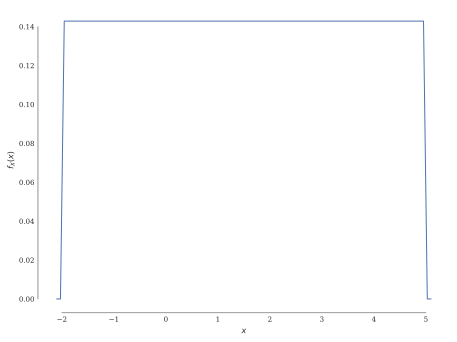

In [14]:
fig, ax = plt.subplots()
xs = np.linspace(a - 0.1, b + 0.1, 100)
ax.plot(xs, X.pdf(xs))
ax.set_xlabel("$x$")
ax.set_ylabel("$f_X(x)$")
sns.despine(trim=True);

The CDF is:

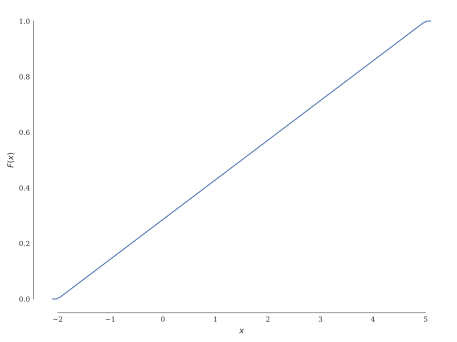

In [15]:
fig, ax = plt.subplots()
xs = np.linspace(a - 0.1, b + 0.1, 100)
ax.plot(xs, X.cdf(xs))
ax.set_xlabel("$x$")
ax.set_ylabel("$F(x)$")
sns.despine(trim=True);

The expectation is:

In [16]:
print(f"E[X] = {X.expect():.2f}")

E[X] = 1.50


And the variance:

In [17]:
# The variance is:
print(f"V[X] = {X.var():.2f}")

V[X] = 4.08


And here are a few random samples:

In [18]:
X.rvs(size=100)

array([ 3.16665541, -0.18104791,  1.96342543,  4.18870164,  3.23764465,
       -0.82096326,  4.98052135, -1.38981321, -0.50330442,  3.04544003,
        3.57291963, -0.0246068 , -0.75965116,  2.95439047, -1.12582801,
       -0.21330492, -0.06041608,  1.05717779,  3.74259905,  1.22815532,
        4.46087461,  4.65834513,  1.98313002, -0.3457419 ,  0.52873396,
        2.19216614,  0.58014778,  3.48916931,  2.58836805, -0.09261791,
        2.6469498 ,  1.44946877,  2.43532653,  0.58238562, -0.49375135,
        1.56556198,  2.15663798,  4.02352609,  0.50995412, -1.3694415 ,
        3.63864776,  4.20909284,  0.21081806,  0.9119826 ,  0.39183794,
        3.40977852,  0.4506317 , -0.81889945,  0.43709493,  2.72611971,
        2.79490825,  0.28771322,  1.04592226,  2.35724624,  0.23814042,
        3.04293161,  3.45193204,  4.64232531, -1.44629507,  2.22385568,
       -0.14967713,  2.57377918, -1.03224389,  1.61921102, -0.97853337,
        0.29126199,  2.56444605,  2.32616012,  0.57708777, -0.61

(uniform-ab-alt)=
## Alternative way to get $U([a,b])$

There is another way to obtain samples from $U([a,b])$ that uses only samples from $U([0,1])$.
Here is how. Let $Z$ be a standard uniform random variable:

$$
Z\sim U([0,1]).
$$

Then define the random variable:

$$
X = a + (b-a) Z.
$$

Then, $X\sim U([a,b])$. Why? Well, let's just show that the CDF of $X$ has the right form:

$$
p(X \le x) = p(a + (b-a)Z \le x) = p((b-a)Z \le x - a) = p\left(Z \le \frac{x-a}{b-a}\right) = \frac{x-a}{b-a},
$$

where the last step follows from the fact that the CDF of $Z$ is simply: $p(Z \le z) = z$.
Equipped with this result, we can sample $X$ by sampling $Z$ and then scaling it appropriately (by the way, this is what ``scipy.stats`` is doing internally). Here it is using ``numpy.random.rand`` to sample in $[0,1]$:

In [19]:
x_samples = a + (b - a) * np.random.rand(1000)
print(x_samples)

[ 1.69239621  0.9757347   2.01930877  0.97124803 -1.78383998  3.50721793
  3.85687481  1.34565458  2.65133676  2.73446522  3.58543036  0.03099628
  3.00420889 -1.49087007  3.98757702  0.62403014  4.06576063  3.34915879
  0.7844617  -0.01357119  3.79397164 -0.41609199 -0.1838001   3.73428323
  1.74670737  3.28665485  2.66908929  0.38709258  2.62388955  0.14602571
  1.12803562 -1.07811501  0.4938018   0.87187493 -0.17122994  3.63108869
 -1.62355923  3.09161146  3.95091639  2.52920018  0.41394578  4.83210917
  1.01172741 -0.0238804   2.69182884 -1.92775519  2.73843321 -1.93005121
 -1.05087812  2.36430478  3.4843959   1.50841697  0.48301237  1.11976217
  1.0858566   2.74410851  4.10218827  2.31230585  1.86022678 -0.43176399
  2.19977026  2.61475477  0.44763574 -1.68342423  1.29116325  0.41739773
  4.68193632 -0.58008792  0.24255565  4.16571672  3.09296445  1.63990842
 -1.40279869 -0.74046118  2.84061453 -0.39366519  4.02480577 -0.24199919
  3.95768273  4.57654153  0.89029425  3.94460064 -0

Let's also do the histogram of x_samples to make sure they are distributed the right way:

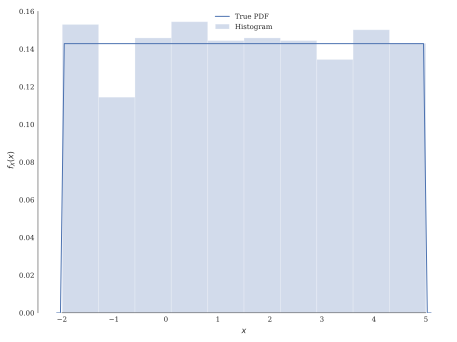

In [20]:
fig, ax = plt.subplots()
ax.plot(xs, X.pdf(xs), label="True PDF")
ax.hist(x_samples, density=True, alpha=0.25, label="Histogram",
        color=sns.color_palette()[0])
ax.set_xlabel("$x$")
ax.set_ylabel("$f_X(x)$")
plt.legend(loc="best")
sns.despine(trim=True);

## Questions

+ Rerun the code above so that the random variable is $U([1, 10])$.